# Citation Network Analysis
<br><br>
In this notebook we are going to explore the citation analysis in “Climate Change Mitigation” using Scopus API in
the last five years.<br> This notebook is part of Social Network analysis course project.

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

plt.style.use('ggplot')

In [476]:
# Read data to pandas dataframe
data = pd.read_csv('scopus_data.csv')

# Print first 5 rows of raw data
data.head()

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Monerie P.-A., Pohl B., Gaetani M.",36995939400;8934032500;15319055900;,The fast response of Sahel precipitation to cl...,2021,npj Climate and Atmospheric Science,4,1,24,NaN,NaN,...,NaN,NaN,NaN,English,npj Clim. Atmos. Sci.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85103988374
1,"Koh L.P., Zeng Y., Sarira T.V., Siman K.",7004786474;55344338300;57217291359;57222126865;,Carbon prospecting in tropical forests for cli...,2021,Nature Communications,12,1,1271,NaN,NaN,...,NaN,NaN,33627656.0,English,Nat. Commun.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85101550210
2,"West T.A.P., Salekin S., Melia N., Wakelin S.J...",55970453700;56664449200;56862288100;7005793487...,Diversification of forestry portfolios for cli...,2021,Journal of Environmental Management,289,NaN,112482,NaN,NaN,...,NaN,JEVMA,33813299.0,English,J. Environ. Manage.,Article,Final,NaN,Scopus,2-s2.0-85103643397
3,Basupi I.,55602343700;,Implications of Climate Change Mitigation and ...,2021,Journal of Infrastructure Systems,27,2,04021009,NaN,NaN,...,NaN,NaN,NaN,English,J. Infrastruct. Syst.,Article,Final,NaN,Scopus,2-s2.0-85103308527
4,"Azevedo I., Leal V.",7006492454;6603496558;,A new model for ex-post quantification of the ...,2021,Renewable and Sustainable Energy Reviews,143,NaN,110890,NaN,NaN,...,NaN,RSERF,NaN,English,Renewable Sustainable Energy Rev,Article,Final,NaN,Scopus,2-s2.0-85103287888


In [477]:
# Select columns that we want to use
data = data.iloc[:, [0, 1, 2, 14, 15, 17]]
data.head()

,Authors,Author(s) ID,Title,Affiliations,Authors with affiliations,Author Keywords
0,"Monerie P.-A., Pohl B., Gaetani M.",36995939400;8934032500;15319055900;,The fast response of Sahel precipitation to cl...,National Centre for Atmospheric Science (NCAS)...,"Monerie, P.-A., National Centre for Atmospheri...",NaN
1,"Koh L.P., Zeng Y., Sarira T.V., Siman K.",7004786474;55344338300;57217291359;57222126865;,Carbon prospecting in tropical forests for cli...,"Centre for Nature-based Climate Solutions, and...","Koh, L.P., Centre for Nature-based Climate Sol...",NaN
2,"West T.A.P., Salekin S., Melia N., Wakelin S.J...",55970453700;56664449200;56862288100;7005793487...,Diversification of forestry portfolios for cli...,"Scion—New Zealand Forest Research Institute, R...","West, T.A.P., Scion—New Zealand Forest Researc...",3-PG; Climate change adaptation; Forest manage...
3,Basupi I.,55602343700;,Implications of Climate Change Mitigation and ...,"Climate Change Div., Botswana Institute for Te...","Basupi, I., Climate Change Div., Botswana Inst...",Climate change mitigation; Optimization; Sanit...
4,"Azevedo I., Leal V.",7006492454;6603496558;,A new model for ex-post quantification of the ...,"University of Porto, Faculty of Engineering (F...","Azevedo, I., University of Porto, Faculty of E...",Climate change mitigation; Energy planning; Lo...


In [478]:
data.info()
# Save new dataframe to csv file
data.to_csv('parsed_data.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Authors                    752 non-null    object
 1   Author(s) ID               752 non-null    object
 2   Title                      752 non-null    object
 3   Affiliations               747 non-null    object
 4   Authors with affiliations  751 non-null    object
 5   Author Keywords            637 non-null    object
dtypes: object(6)
memory usage: 35.4+ KB


<br>Next we would like to analyze how authors compare to each other in terms of number of publications and what kind of keywords are used in these papers. However we notice that certian columns contain multiple wanted elements in each row. These values are Authors, Author(s) ids and Author keywords. Next we need to compose some kind of lists from the information given in data file. Let's start by exploding these columns into lists where don't care about relations between these objects.<br>

In [479]:
data['Author(s) ID'] = data['Author(s) ID'].str.split(';')
data['Authors'] = data['Authors'].str.split(', ')
data['Author Keywords'] = data['Author Keywords'].str.split('; ')

res_ids = data.explode('Author(s) ID').reset_index(drop=True)
res_authors = data.explode('Authors').reset_index(drop=True)
res_keywords = data.explode('Author Keywords')

author_ids = res_ids['Author(s) ID'].values.tolist()
authors = res_authors['Authors'].values.tolist()
keywords = res_keywords["Author Keywords"].values.tolist()

author_ids = list(filter(None, author_ids))
authors = list(filter(None, authors))
keywords = [x for x in keywords if str(x) != 'nan']


#print(Counter(author_ids))
#print(len(author_ids))
#print(len(authors))
#print(len(keywords))

zip_iterator = zip(author_ids, authors)

a_dictionary = dict(zip_iterator)
print(a_dictionary)
#print(len(a_dictionary))

{'36995939400': 'Monerie P.-A.', '8934032500': 'Pohl B.', '15319055900': 'Gaetani M.', '7004786474': 'Koh L.P.', '55344338300': 'Zeng Y.', '57217291359': 'Sarira T.V.', '57222126865': 'Siman K.', '55970453700': 'West T.A.P.', '56664449200': 'Salekin S.', '56862288100': 'Melia N.', '7005793487': 'Wakelin S.J.', '37058097500': 'Yao R.T.', '7801384122': 'Meason D.', '55602343700': 'Basupi I.', '7006492454': 'Douglas A.', '6603496558': 'Horta I.', '56974428600': 'Zhang L.', '13805671700': 'Simmons A.T.', '8258491400': 'White R.P.', '8720819200': 'Waters C.M.', '7202895179': 'Rosen R.A.', '57194621290': 'Gambelli A.M.', '35075875800': 'Full J.', '57222863684': 'Merseburg S.', '56529640100': 'Miehe R.', '55862727700': 'Sauer A.', '23018199200': 'Brand C.', '37103767900': 'Dons E.', '56964093600': 'Anaya-Boig E.', '56964279600': 'Avila-Palencia I.', '57200918199': 'Clark A.', '6504250744': 'de Nazelle A.', '36760639100': 'Gascon M.', '56780389200': 'Gaupp-Berghausen M.', '54982953700': 'Gerik

<br>Now we can count how many times one author is mentioned in publication and plot results to histogram. **Note** that only first 300 authors are included in plot. Rest of the authors had their name mentioned once in this dataset<br>

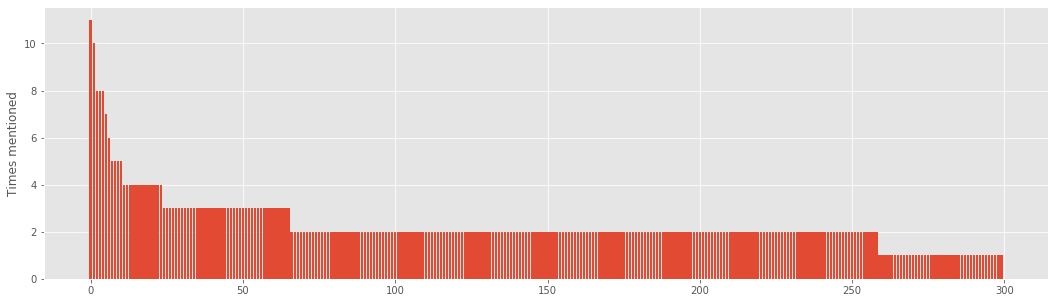

In [480]:
auth_counter = Counter(author_ids)
frequent_names, frequent_counts = zip(*auth_counter.most_common(300))

fig, ax = plt.subplots(figsize=(18,5))
plt.bar(np.arange(len(frequent_names)), frequent_counts, align='center')
plt.ylabel('Times mentioned')
plt.show()

<br>Let's also print the keyword occurences and check which keywords were the most popular ones.<br>

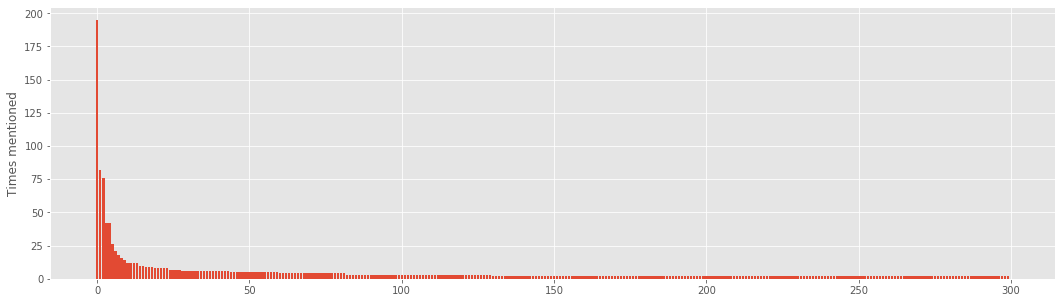

In [481]:
keyword_counter = Counter(keywords)
frequent_keywords, frequent_wordcounts = zip(*keyword_counter.most_common(300))

fig, ax = plt.subplots(figsize=(18,5))
plt.bar(np.arange(len(frequent_keywords)), frequent_wordcounts, align='center')
plt.ylabel('Times mentioned')
plt.show()

In [482]:
print("Most popular keywors:\n")
for i in range(50):
    print("{}. {} \n".format(i+1, frequent_keywords[i]))

Most popular keywors:

1. Climate change 

2. Climate change mitigation 

3. Mitigation 

4. Adaptation 

5. climate change 

6. climate change mitigation 

7. Agriculture 

8. mitigation 

9. Carbon sequestration 

10. Renewable energy 

11. Climate policy 

12. REDD+ 

13. Bioenergy 

14. Sustainability 

15. adaptation 

16. Greenhouse gas 

17. CO2 emissions 

18. Greenhouse gas emissions 

19. Biomass 

20. Climate change adaptation 

21. Carbon footprint 

22. Vulnerability 

23. Governance 

24. Emissions 

25. Sustainable development 

26. Soil organic carbon 

27. Co-benefits 

28. Climate Change 

29. agriculture 

30. climate policy 

31. Energy efficiency 

32. Life cycle assessment 

33. Climate mitigation 

34. Resilience 

35. GHG emissions 

36. Scenario analysis 

37. Land use 

38. food security 

39. Cities 

40. Carbon 

41. Paris Agreement 

42. Uncertainty 

43. China 

44. India 

45. Forest management 

46. Carbon stock 

47. Energy consumption 

48. Carbon tax 

### Construct graph